Accuracy:  0.0
Precision: 0.0
Recall: 0.0
F1: 0.0


Classification Report:                precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

AUC:  1.0


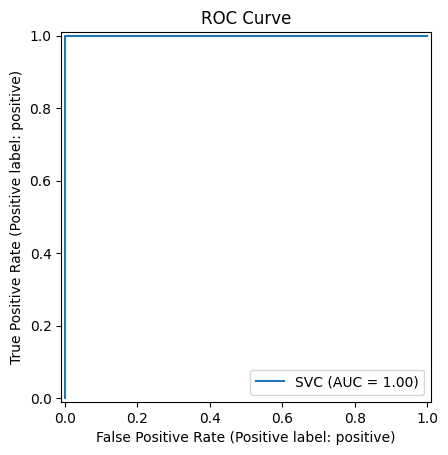

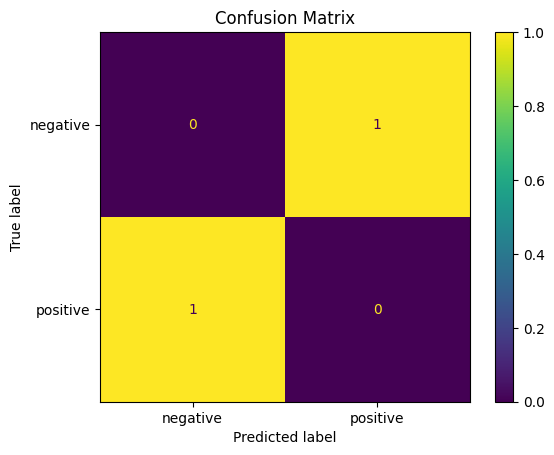

['positive' 'positive']


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

data = pd.read_csv('data.tsv', sep='\t')
X = data['text']
y = data['tag']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC( probability= True)                              # switch to SVM or Logisitic here                        
clf.fit(X_train, y_train)                   

y_pred = clf.predict(X_test)

Accuracy = accuracy_score(y_test,y_pred)
Precision = precision_score(y_test,y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
F1 = f1_score(y_test,y_pred, average='macro')

print("Accuracy: ",Accuracy)
print("Precision:",Precision)
print("Recall:",Recall)
print("F1:",F1)
print("\n")

print("Classification Report: ",classification_report(y_test,y_pred))

y_probs = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test,y_probs)
print("AUC: ",auc)

RocCurveDisplay.from_estimator(clf,X_test,y_test)
plt.title("ROC Curve")
plt.show()

ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test)
plt.title("Confusion Matrix")
plt.show()
print(clf.predict(vectorizer.transform(['This is a test sentence', 'Another test sentence'])))